# Лабараторная №1. Основый предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

1. Номинальные: checking_status, credit_history, personal_status, property_magnitude, housing, job, telephone, foreign_worker, class
    #Порядковые: employment
    #Интервальные: 
    #Абсолютные: duration, credit_amount, residence_since, age, existing_credits, num_dependets
        

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530903_70301.csv'
credit_df = pd.read_csv(path, index_col=0)
credit_df.info()
credit_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   checking_status     502 non-null    object 
 1   duration            502 non-null    float64
 2   credit_history      502 non-null    object 
 3   credit_amount       501 non-null    float64
 4   employment          502 non-null    object 
 5   personal_status     502 non-null    object 
 6   residence_since     485 non-null    float64
 7   property_magnitude  502 non-null    object 
 8   age                 502 non-null    float64
 9   housing             502 non-null    object 
 10  existing_credits    502 non-null    float64
 11  job                 502 non-null    object 
 12  num_dependents      502 non-null    float64
 13  own_telephone       502 non-null    object 
 14  foreign_worker      502 non-null    object 
 15  class               502 non-null    object 
dtypes: float

,duration,credit_amount,residence_since,age,existing_credits,num_dependents
count,502.000,501.000,485.000,502.000,502.000,502.000
mean,21.460,3236.230,2.821,35.542,1.420,1.167
std,11.983,2843.499,1.151,11.274,0.586,0.374
min,4.000,0.000,0.000,19.000,1.000,1.000
25%,12.000,1358.000,2.000,27.000,1.000,1.000
50%,18.000,2325.000,3.000,33.000,1.000,1.000
75%,24.000,3959.000,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


2. num_dependents

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
credit_df.var()

3. duration

In [ ]:
abs(1-credit_df[credit_df['class']=='good'].mean()/credit_df[credit_df['class']=='bad'].mean())

4. Больше skilled работников в классе good

In [ ]:
good = credit_df[(credit_df['class']=='good') & (credit_df['job']=='skilled')].shape[0]
bad = credit_df[(credit_df['class']=='bad') & (credit_df['job']=='skilled')].shape[0]
print(good)
print(bad)

5. Есть выбросы в duration, credit_amount, age

<AxesSubplot:>

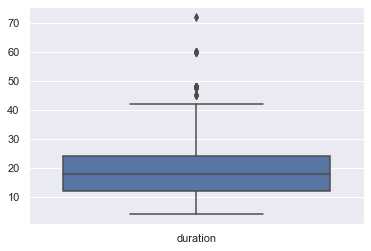

In [6]:
sns.boxplot(data=credit_df[['duration']])

<AxesSubplot:>

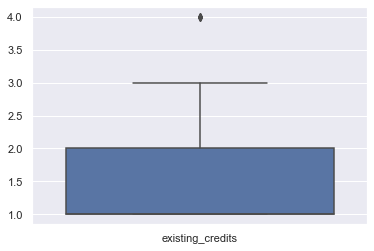

In [7]:
sns.boxplot(data=credit_df[['existing_credits']])

<AxesSubplot:>

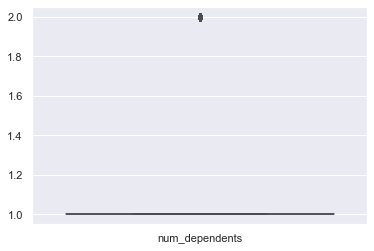

In [8]:
sns.boxplot(data=credit_df[['num_dependents']])

<AxesSubplot:>

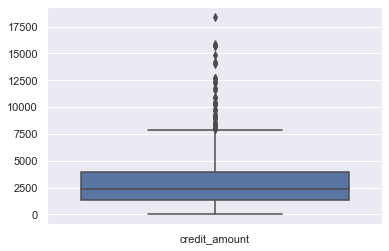

In [9]:
sns.boxplot(data=credit_df[['credit_amount']])

<AxesSubplot:>

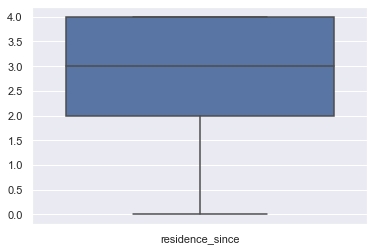

In [10]:
sns.boxplot(data=credit_df[['residence_since']])

<AxesSubplot:>

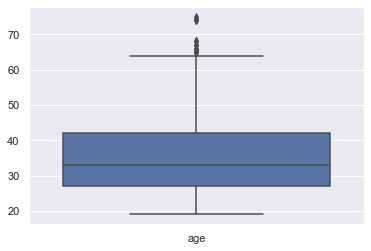

In [11]:
sns.boxplot(data=credit_df[['age']])

6. Пропущено 42 значения credit_history и 8 значений credit_amount.

In [ ]:
print(credit_df[credit_df['credit_amount']==0].shape[0] + credit_df[credit_df['credit_history']=='unknown'].shape[0])
print(credit_df[(credit_df['credit_amount']==0) | (credit_df['credit_history']=='unknown')].shape[0])

7. Заменили нулевые значения credit_amount на -1

In [25]:
credit_df.loc[credit_df['credit_amount']==0, 'credit_amount'] = -1

8. Графики исследования

<AxesSubplot:>

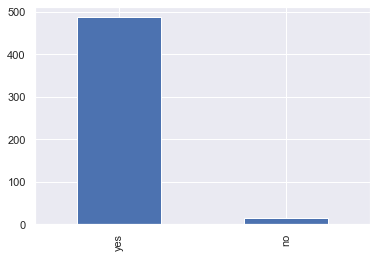

In [31]:
credit_df['foreign_worker'].value_counts().plot(kind='bar')

<AxesSubplot:>

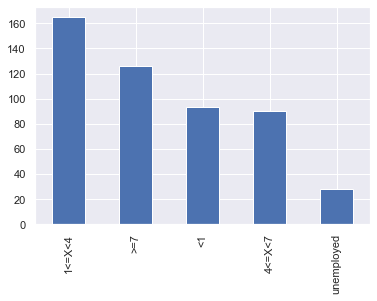

In [30]:
credit_df['employment'].value_counts().plot(kind='bar')

c:\users\maxim\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

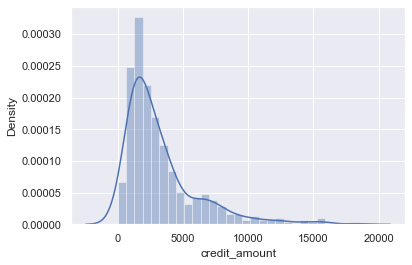

In [28]:
sns.distplot(credit_df['credit_amount'])

9. По графикам ниже можно заметить линейную связь между размером кредита и длительностью.

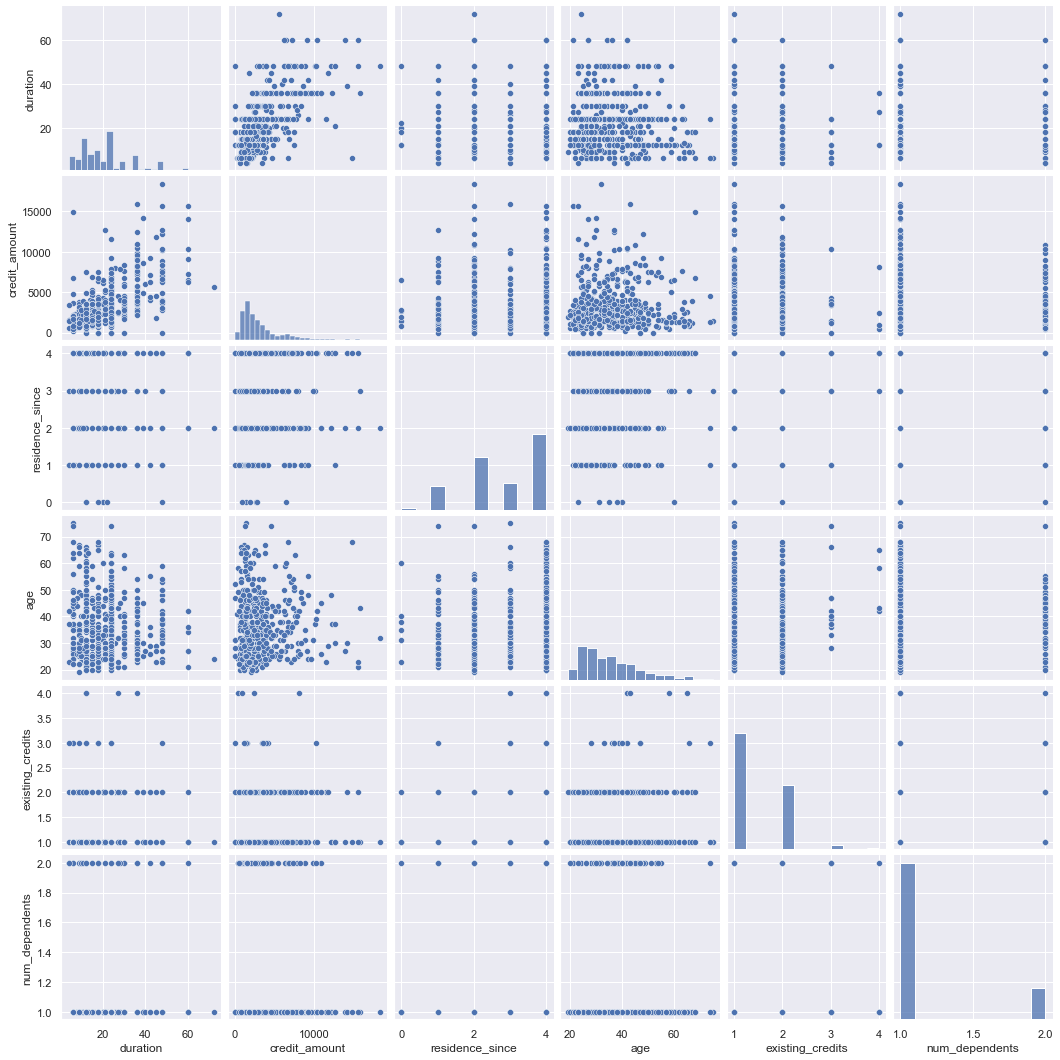

In [34]:
num_columns = ['duration', 'credit_amount', 'residence_since', 'age', 'existing_credits', 'num_dependents']
sns.pairplot(credit_df[num_columns])

<AxesSubplot:>

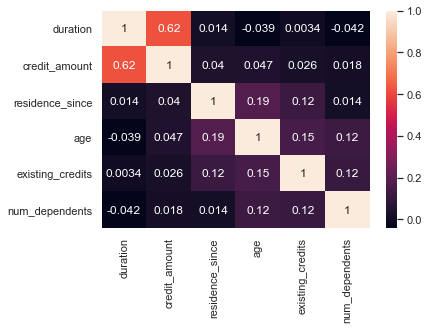

In [35]:
corr_matrix = credit_df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

10. В теории, можно стандартизирвоать любую абсолютную величину, но в конкретном случае мы не нашли целесообразным что-либо стандартизировать, так как не видим прикладного значения

11. Ввести признак "Salary"